In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s


In [3]:
reg = 'Car'
line = 'CarB'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

64.1908215763451

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,0.2,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                   \
             75%          max     count        mean         std      min   
ils                                                                        
0      13.615549    15.845764     345.0   16.430464   64.046102   0.0000   
1      22.955463    25.091664     545.0   17.494602   62.044452   0.0000   
2      36.165933    39.802429    1537.0   25.796340   69.907705   0.0000   
3      58.352033    63.087057    3657.0   39.906565  103.728555   0.0000   
4      91.900381    99.997282    8466.0   49.057170   98.018421   0.0000   
5     145.717643   158.486965   19558.0   71.962320  113.615715   0.0000   
6     229.780871   251.183547   41364.0   93.373491  126.605334   0.0000   
7     362.485188   398.103869   81798.0  109.837026  147.121094   0.0000   
8     563.468657   630.956505  115054.0  131.850773  174.052856   0.0000   
9     838.204338   999.996825   83148.0  182.331487  201.737177   0.0000   
10   1175.828411  1582.435391    9341.0  178.330770  260.322953   0.0000   
11   1674.020151  1693.387954       9.0  196.083856  144.546490  12.6736   

                                              
          25%       50%       75%        max  
ils                                           
0      0.3364    1.4884    4.4521   583.7056  
1      0.4761    2.2801    7.6176   574.5609  
2      0.7569    3.8416   13.9876   595.3600  
3      1.5129    7.4529   24.7009  1143.7924  
4      2.5600   12.1104   42.7716  1025.9209  
5      5.0625   22.7529   81.9025   989.1025  
6      9.0601   40.8321  127.6900  1239.7441  
7     10.0489   46.9225  149.5729  1183.3600  
8      9.7969   49.0000  197.6836  1713.9600  
9     20.8849  100.6009  302.7600  1973.1364  
10    15.6025   87.9844  223.8016  2344.4964  
11   144.7209  177.4224  257.2816   437.2281

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s)
r0

1.1675592145112934

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.8700339214062076

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

5.004322653840384

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [14]:
m = 1.0

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(64.1908215763451, 1.1675592145112934, 1.0)

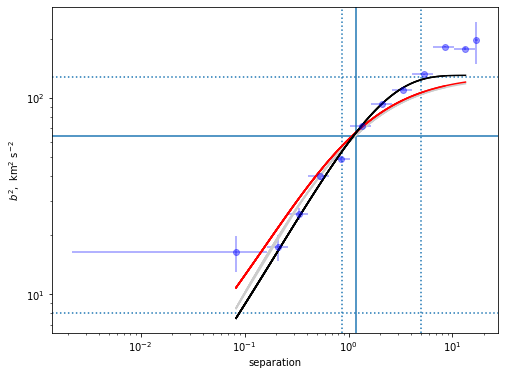

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.025), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'], 2.0), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [17]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                   \
             75%          max     count        mean         std      min   
ils                                                                        
0      13.615549    15.845764     345.0   16.430464   64.046102   0.0000   
1      22.955463    25.091664     545.0   17.494602   62.044452   0.0000   
2      36.165933    39.802429    1537.0   25.796340   69.907705   0.0000   
3      58.352033    63.087057    3657.0   39.906565  103.728555   0.0000   
4      91.900381    99.997282    8466.0   49.057170   98.018421   0.0000   
5     145.717643   158.486965   19558.0   71.962320  113.615715   0.0000   
6     229.780871   251.183547   41364.0   93.373491  126.605334   0.0000   
7     362.485188   398.103869   81798.0  109.837026  147.121094   0.0000   
8     563.468657   630.956505  115054.0  131.850773  174.052856   0.0000   
9     838.204338   999.996825   83148.0  182.331487  201.737177   0.0000   
10   1175.828411  1582.435391    9341.0  178.330770  260.322953   0.0000   
11   1674.020151  1693.387954       9.0  196.083856  144.546490  12.6736   

                                              
          25%       50%       75%        max  
ils                                           
0      0.3364    1.4884    4.4521   583.7056  
1      0.4761    2.2801    7.6176   574.5609  
2      0.7569    3.8416   13.9876   595.3600  
3      1.5129    7.4529   24.7009  1143.7924  
4      2.5600   12.1104   42.7716  1025.9209  
5      5.0625   22.7529   81.9025   989.1025  
6      9.0601   40.8321  127.6900  1239.7441  
7     10.0489   46.9225  149.5729  1183.3600  
8      9.7969   49.0000  197.6836  1713.9600  
9     20.8849  100.6009  302.7600  1973.1364  
10    15.6025   87.9844  223.8016  2344.4964  
11   144.7209  177.4224  257.2816   437.2281

In [18]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [19]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.643693685531616 seconds ---
